# Deep Learning com o dataset MNIST
### Importando depedências  

In [8]:
# Ferramenta para configuração das camadas
import keras 

from keras.datasets import mnist 
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k

# Ferramenta para manipulação da imagem
import matplotlib.pyplot as plt

### Pré-configurando parâmetros

In [9]:
batch_size = 128 
num_classes = 10 
epochs = 12 

Definição da dimensão da imagem

In [10]:
img_rows, img_cols = 28, 28

Divisão dos dados para treino e para teste

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Modificação do formato dos dados 

In [12]:
if k.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(y_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Normalização dos dados na imagem

Garante que todos os dados no array vão está no mesmo formato

In [13]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

Garante que os dados vão variar entre 0 e 255

In [14]:
x_train /= 255
x_test /= 255

Modificação no formato das classes

In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Montagem de rede de maneira sequencial 

Criação do modelo

In [31]:
model = Sequential()

Adicionando camadas ao modelo

In [32]:
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

Compilando modelo

In [33]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=["accuracy"])

### Montangem da rede de maneira funcional 

In [ ]:
inputs = Input(shape=input_shape)

conv1 = Conv2D(32, kernel_size(3,3), activation="relu")(inputs)
conv2 = Conv2D(64, kernel_size(3,3), activation="relu")(conv1)
pool = MaxPooling2D(pool_size=(2,2))(conv2)
dropout1 = Dropout(0.25)(pool)
flat = Flatten()(dropout1)
dense1 = Dense(128, activation="relu")(flat)
dropout2 = Dropout(0.5)(dense1)
dense2 = Dense(num_classes, activation="softmax")(dropout2)

model_functional = Model(inputs=inputs, outputs=dense2)

model_functional.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=["accuracy"])

model_functional.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
          verbose=1, validation_data=(x_test, y_test))

### Treinamento do modelo 

In [34]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
          verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.2828 - acc: 0.9139 - val_loss: 0.0558 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0911 - acc: 0.9737 - val_loss: 0.0387 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0678 - acc: 0.9804 - val_loss: 0.0342 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0554 - acc: 0.9836 - val_loss: 0.0348 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0480 - acc: 0.9859 - val_loss: 0.0326 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0411 - acc: 0.9874 - val_loss: 0.0326 - val_acc: 0.9892
Epoch 7/12
60000/60000 [====

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Teste de erro: ", score[0])
print("Teste de acurácia: ", score[1])

Teste de erro:  0.027131692822667537
Teste de acurácia:  0.9919


### Salvando modelo e pesos 

In [39]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [40]:
model.save_weights("model.h5")

In [47]:
result = model.predict(x_train[:1])

In [50]:
result.argmax()

5

In [51]:
result

array([[1.3975937e-09, 1.2091659e-09, 3.8736928e-10, 1.9503491e-02,
        2.6503435e-11, 9.8049521e-01, 2.9215741e-07, 1.7327507e-09,
        1.5124928e-07, 8.2973975e-07]], dtype=float32)

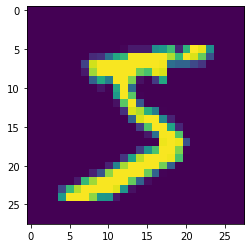

In [63]:
plt.imshow(x_train[0].reshape(img_rows, img_cols))

### Carregando modelo e pesos 

In [1]:
from keras.models import model_from_json

Using TensorFlow backend.
/home/luis/.local/share/virtualenvs/presentation-deep-learning-with-images-gF04bXjw/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luis/.local/share/virtualenvs/presentation-deep-learning-with-images-gF04bXjw/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luis/.local/share/virtualenvs/presentation-deep-learning-with-images-gF04bXjw/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a f

Carregando modelo 

In [6]:
with open("model.json", "r") as json_file:
    loaded_model = model_from_json(json_file.read())

Carregando pesos no modelo

In [18]:
loaded_model.load_weights("model.h5")

In [19]:
loaded_model.predict(x_train[:1])

array([[1.3975937e-09, 1.2091659e-09, 3.8736928e-10, 1.9503491e-02,
        2.6503435e-11, 9.8049521e-01, 2.9215741e-07, 1.7327507e-09,
        1.5124928e-07, 8.2973975e-07]], dtype=float32)

In [23]:
loaded_model.save("model_weight.h5")

In [21]:
type(loaded_model)

keras.engine.sequential.Sequential

### Converter modelo para TensorFlow.js

```bash
tensorflowjs_converter --input_format type_framework name_model.h5 path_save_model/  
```